# <div style="text-align: center;"><u>**HousingPricePredictor-Asturias - Aitor Pérez**</u></div>

### **#️⃣ Descripción del proyecto**
Este proyecto utiliza Machine Learning para predecir los precios de viviendas en Asturias. El modelo se entrena con datos scrapeados de Idealista, que incluyen características como tipo de inmueble, ubicación, metros cuadrados, número de habitaciones y precio. El objetivo es proporcionar una herramienta que ayude a compradores a tomar decisiones informadas sobre viviendas.

### **🎯 Objetivo del Proyecto**
1. Predecir el precio de viviendas en función de sus características.
2. Identificar las variables más influyentes en el precio (metros cuadrados, ubicación, etc.).
3. Comparar diferentes modelos de Machine Learning para seleccionar el más adecuado.
4. Proporcionar una solución práctica para el análisis del mercado inmobiliario en Asturias.


### **🧷 Importación de librerías**

In [ ]:
# | -------------------------------- |
# | Cargar librerias necesarias      |
# | -------------------------------- |

# Librerías estándar
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
sys.path.append(os.path.join(os.getcwd(), '../utils'))

# Módulos personalizados
from toolbox_ML import *
from bootcampviztools import *

# Desactivamos los warnings
import warnings
warnings.simplefilter("ignore")

# Definir configuraciones generales y colores
sns.set_theme(style='white', palette='colorblind')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
gcolors = {'oscuro': '#1e35a1', 'medio': '#0c79f3', 'claro': '#59a7ff'}

In [2]:
# Cargar datos y mostrar las primeras filas
df = pd.read_csv("../data_sample/scrap_data_asturias.csv", sep=";")
df.head()

,Id del anuncio,Tipo de inmueble,Tipo de vendedor,Barrio,Municipio,Distrito,Precio,Euros/m2,Metros cuadrados construidos,Habitaciones,Baños,Planta,Latitud,Longitud,Ascensor (Sí/No),Obra nueva (Sí/No),Piscina (Sí/No),Terraza (Sí/No),Parking (Sí/No),Parking incluído en el precio (Sí/No),Aire acondicionado (Sí/No),Trastero (Sí/No),Jardín (Sí/No)
0,310905,Duplex,Particular,-,Cangas de Narcea,-,77000.0,1222.0,63,1.0,1.0,3,"43,1746686","-6,5518582",No,No,No,Sí,No,No,No,No,No
1,316842,Piso,Particular,-,Grado,-,80000.0,920.0,87,3.0,1.0,2,"43,3870028","-6,0759685",No,No,No,No,No,No,No,No,No
2,325749,Piso,Particular,-,Aller,-,70000.0,1167.0,60,2.0,1.0,2,"43,1593694","-5,6203693",Sí,No,No,No,No,No,No,Sí,No
3,340311,Piso,Particular,Fozaneldi-Tenderina,Oviedo,Fozaneldi-Tenderina-Ventanielles,110000.0,2750.0,40,1.0,1.0,2,"43,3624612","-5,8325263",Sí,No,No,No,No,No,No,Sí,No
4,400928,Piso,Particular,HUCA-La Cadellada,Oviedo,Corredoria-Huca-Teatinos,160000.0,3333.0,48.0,1.0,1.0,5,"43,3727912","-5,8297483",Sí,No,No,No,No,No,No,No,No


In [3]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Id del anuncio                         3678 non-null   int64  
 1   Tipo de inmueble                       3678 non-null   object 
 2   Tipo de vendedor                       3678 non-null   object 
 3   Barrio                                 3678 non-null   object 
 4   Municipio                              3678 non-null   object 
 5   Distrito                               3678 non-null   object 
 6   Precio                                 3678 non-null   float64
 7   Euros/m2                               3678 non-null   float64
 8   Metros cuadrados construidos           3678 non-null   object 
 9   Habitaciones                           3678 non-null   float64
 10  Baños                                  3678 non-null   float64
 11  Plan

In [4]:
# Deescrición estadística del dataset
describe_df(df)

,Id del anuncio,Tipo de inmueble,Tipo de vendedor,Barrio,Municipio,Distrito,Precio,Euros/m2,Metros cuadrados construidos,Habitaciones,Baños,Planta,Latitud,Longitud,Ascensor (Sí/No),Obra nueva (Sí/No),Piscina (Sí/No),Terraza (Sí/No),Parking (Sí/No),Parking incluído en el precio (Sí/No),Aire acondicionado (Sí/No),Trastero (Sí/No),Jardín (Sí/No)
DATA_TYPE,int64,object,object,object,object,object,float64,float64,object,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,3584,5,2,59,62,55,721,1902,369,11,8,20,3286,3283,2,2,2,2,2,2,2,2,2
CARDIN(%),97.444,0.136,0.054,1.604,1.686,1.495,19.603,51.713,10.033,0.299,0.218,0.544,89.342,89.26,0.054,0.054,0.054,0.054,0.054,0.054,0.054,0.054,0.054


### **🧹 Limpieza de datos**

Viendo la estructura de las columnas, voy a aprovechar para pasarlas a formatearlas un poco.

In [5]:
# Diccionario con los nombres de las columnas a cambiar
columnas = {
    'Id del anuncio': 'id',
    'Tipo de inmueble': 'tipo_inmueble',
    'Tipo de vendedor': 'tipo_vendedor',
    'Barrio': 'barrio',
    'Municipio': 'municipio',
    'Distrito': 'distrito',
    'Precio': 'precio',
    'Euros/m2': 'euros_m2',
    'Metros cuadrados construidos': 'm2_construidos',
    'Habitaciones': 'habitaciones',
    'Baños': 'banios',
    'Planta': 'planta',
    'Latitud': 'latitud',
    'Longitud': 'longitud',
    'Ascensor (Sí/No)': 'ascensor',
    'Obra nueva (Sí/No)': 'obra_nueva',
    'Piscina (Sí/No)': 'piscina',
    'Terraza (Sí/No)': 'terraza',
    'Parking (Sí/No)': 'parking',
    'Parking incluído en el precio (Sí/No)': 'parking_incluido',
    'Aire acondicionado (Sí/No)': 'aire_acondicionado',
    'Trastero (Sí/No)': 'trastero',
    'Jardín (Sí/No)': 'jardin',
}


# Renombrar las columnas usando el diccionario
df = df.rename(columns=columnas)

# Asignar el "id" como índice
df = df.set_index("id")

# Verificar los cambios
df.head()

,tipo_inmueble,tipo_vendedor,barrio,municipio,distrito,precio,euros_m2,m2_construidos,habitaciones,banios,planta,latitud,longitud,ascensor,obra_nueva,piscina,terraza,parking,parking_incluido,aire_acondicionado,trastero,jardin
id,,,,,,,,,,,,,,,,,,,,,,
310905,Duplex,Particular,-,Cangas de Narcea,-,77000.0,1222.0,63,1.0,1.0,3,"43,1746686","-6,5518582",No,No,No,Sí,No,No,No,No,No
316842,Piso,Particular,-,Grado,-,80000.0,920.0,87,3.0,1.0,2,"43,3870028","-6,0759685",No,No,No,No,No,No,No,No,No
325749,Piso,Particular,-,Aller,-,70000.0,1167.0,60,2.0,1.0,2,"43,1593694","-5,6203693",Sí,No,No,No,No,No,No,Sí,No
340311,Piso,Particular,Fozaneldi-Tenderina,Oviedo,Fozaneldi-Tenderina-Ventanielles,110000.0,2750.0,40,1.0,1.0,2,"43,3624612","-5,8325263",Sí,No,No,No,No,No,No,Sí,No
400928,Piso,Particular,HUCA-La Cadellada,Oviedo,Corredoria-Huca-Teatinos,160000.0,3333.0,48.0,1.0,1.0,5,"43,3727912","-5,8297483",Sí,No,No,No,No,No,No,No,No


In [6]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3678 entries, 310905 to 107658087
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tipo_inmueble       3678 non-null   object 
 1   tipo_vendedor       3678 non-null   object 
 2   barrio              3678 non-null   object 
 3   municipio           3678 non-null   object 
 4   distrito            3678 non-null   object 
 5   precio              3678 non-null   float64
 6   euros_m2            3678 non-null   float64
 7   m2_construidos      3678 non-null   object 
 8   habitaciones        3678 non-null   float64
 9   banios              3678 non-null   float64
 10  planta              3678 non-null   object 
 11  latitud             3678 non-null   object 
 12  longitud            3678 non-null   object 
 13  ascensor            3678 non-null   object 
 14  obra_nueva          3678 non-null   object 
 15  piscina             3678 non-null   object 
 16  t

Observando las columnas, nos damos cuenta que `m2_construidos`, `latitud` y `longitud`, aparecen como object y deberían ser numéricos.

In [7]:
# Lista de columnas numéricas problemáticas
numeric_columns_to_clean = [
    'm2_construidos', 
    'latitud', 
    'longitud'
]

# Función para limpiar y convertir a numérico
for col in numeric_columns_to_clean:
    df[col] = df[col].str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')

Decido que las columnas, de "Si/No" pasan a ser 1/0

In [8]:
# Lista de columnas binarias
binary_columns = [
    'ascensor', 
    'obra_nueva', 
    'piscina', 
    'terraza', 
    'parking', 
    'parking_incluido', 
    'aire_acondicionado', 
    'trastero', 
    'jardin'
]

# Mapear "Sí" -> 1 y "No" -> 0
for col in binary_columns:
    df[col] = df[col].map({'Sí': 1, 'No': 0})

In [9]:
# Revisar valores nulos
df.isnull().sum()

tipo_inmueble         0
tipo_vendedor         0
barrio                0
municipio             0
distrito              0
precio                0
euros_m2              0
m2_construidos        0
habitaciones          0
banios                0
planta                0
latitud               0
longitud              0
ascensor              0
obra_nueva            0
piscina               0
terraza               0
parking               0
parking_incluido      0
aire_acondicionado    0
trastero              0
jardin                0
dtype: int64

In [10]:
conteo_barrio = df["barrio"].value_counts().get("-", 0)
print(conteo_barrio)
conteo_distrito = df["distrito"].value_counts().get("-", 0)
print(conteo_distrito)
conteo_planta = df["planta"].value_counts().get("-", 0)
print(conteo_planta)

1869
938
37


In [12]:
df.index.duplicated().sum()

93

No hay valores nulos, pero hay unos cuantos que tienen valor "-";  
- `Barrio` y `Distrito` Decido sustituir por "Desconocido" ya que pueden aportar información sobre el precio de la vivienda.  
- `Planta` no aporta información tan relevante, por lo que se eliminarán dichas filas

In [11]:
df["barrio"] = df["barrio"].replace("-", "Desconocido")
df["distrito"] = df["distrito"].replace("-", "Desconocido")
df = df[df["planta"] != "-"]

También borro los indices duplicados manteniendo la primera ocurrencia

In [ ]:
df = df[~df.index.duplicated(keep='first')]

<class 'pandas.core.frame.DataFrame'>
Index: 3548 entries, 310905 to 107658087
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tipo_inmueble       3548 non-null   object 
 1   tipo_vendedor       3548 non-null   object 
 2   barrio              3548 non-null   object 
 3   municipio           3548 non-null   object 
 4   distrito            3548 non-null   object 
 5   precio              3548 non-null   float64
 6   euros_m2            3548 non-null   float64
 7   m2_construidos      3548 non-null   float64
 8   habitaciones        3548 non-null   float64
 9   banios              3548 non-null   float64
 10  planta              3548 non-null   object 
 11  latitud             3548 non-null   float64
 12  longitud            3548 non-null   float64
 13  ascensor            3548 non-null   int64  
 14  obra_nueva          3548 non-null   int64  
 15  piscina             3548 non-null   int64  
 16  t

Decido crear un par de nuevas variables pensando que pueden ser interesantes y utiles tanto para el EDA como para el entrenamiento

In [14]:
# -----------------------------------------
# FEATURE ENGINEERING
# -----------------------------------------
# Crear nuevas variables relevantes
df['precio_por_habitacion'] = df['precio'] / df['habitaciones']
df['precio_por_bano'] = df['precio'] / df['banios']

# Mostrar las nuevas features
display(df[['precio_por_habitacion', 'precio_por_bano']].head())

,precio_por_habitacion,precio_por_bano
id,,
310905,77000.000000,77000.0
316842,26666.666667,80000.0
325749,35000.000000,70000.0
340311,110000.000000,110000.0
400928,160000.000000,160000.0


In [15]:
# Guardar el dataset limpio
ruta_procesado = "../data_sample/cleaned_dataset.csv"
df.to_csv(ruta_procesado, index=False)
print(f"✅ Dataset limpio guardado en: {ruta_procesado}")

✅ Dataset limpio guardado en: ../data_sample/cleaned_dataset.csv


### **📋 Tabla de variables**

| Variable               | Definición                                              | Tipo        | Prioridad | Nota                                                                 |
|------------------------|---------------------------------------------------------|-------------|-----------|----------------------------------------------------------------------|
| id                     | Identificador único del inmueble                        | Categórica  | 0         | Índice del DataFrame.                                               |
| tipo_inmueble          | Tipo de inmueble (Piso, Casa, etc.)                      | Categórica  | 1         | Define la categoría del inmueble.                                   |
| tipo_vendedor          | Tipo de vendedor (Particular o Profesional)              | Categórica  | 2         | Puede influir en el precio.                                          |
| barrio                 | Barrio donde se encuentra el inmueble                   | Categórica  | 1         | Nivel de detalle geográfico.                                        |
| municipio              | Municipio donde se encuentra el inmueble                | Categórica  | 0         | Información clave de ubicación.                                     |
| distrito               | Distrito dentro del municipio                            | Categórica  | 2         | No siempre está disponible.                                         |
| precio                 | Precio total del inmueble (€)                            | Numérica    | 0         | Variable objetivo en predicciones.                                  |
| euros_m2               | Precio por metro cuadrado (€)                            | Numérica    | 1         | Indica el valor relativo del inmueble.                              |
| m2_construidos         | Metros cuadrados construidos                             | Numérica    | 0         | Tamaño total del inmueble.                                          |
| habitaciones           | Número de habitaciones                                   | Numérica    | 1         | Relevante para valoración.                                          |
| banios                 | Número de baños                                          | Numérica    | 1         | Influye en el precio.                                               |
| planta                 | Planta en la que se encuentra el inmueble                | Numérica    | 2         | Importante en edificios sin ascensor.                               |
| latitud                | Coordenada de latitud                                    | Numérica    | 2         | Información de geolocalización.                                     |
| longitud               | Coordenada de longitud                                   | Numérica    | 2         | Información de geolocalización.                                     |
| ascensor               | Indica si tiene ascensor (1: Sí, 0: No)                  | Categórica  | 1         | Factor de comodidad.                                                |
| obra_nueva             | Indica si es obra nueva (1: Sí, 0: No)                   | Categórica  | 1         | Puede afectar el precio.                                            |
| piscina                | Indica si tiene piscina (1: Sí, 0: No)                   | Categórica  | 2         | Aumenta valor percibido.                                            |
| terraza                | Indica si tiene terraza (1: Sí, 0: No)                   | Categórica  | 2         | Valorado en ciertos mercados.                                       |
| parking                | Indica si tiene parking (1: Sí, 0: No)                   | Categórica  | 2         | Puede influir en la demanda.                                        |
| parking_incluido       | Indica si el parking está incluido en el precio (1: Sí, 0: No) | Categórica  | 2         | Relacionado con el precio final.                                    |
| aire_acondicionado     | Indica si tiene aire acondicionado (1: Sí, 0: No)        | Categórica  | 2         | Factor de confort.                                                  |
| trastero               | Indica si tiene trastero (1: Sí, 0: No)                  | Categórica  | 2         | Puede añadir valor extra.                                           |
| jardin                 | Indica si tiene jardín (1: Sí, 0: No)                    | Categórica  | 2         | Importante en casas unifamiliares.                                  |
| precio_por_habitacion  | Precio dividido por el número de habitaciones (€)        | Numérica    | 2         | Métrica de valoración.                                              |
| precio_por_bano        | Precio dividido por el número de baños (€)               | Numérica    | 2         | Otra métrica de valoración.                                         |

### **💹 Visualización de los datos**

#### Conclusión: Distribución de Precios en el Dataset

La mayoría de los inmuebles tienen precios por debajo de 200,000 €, con un pico en torno a los 150,000 €. La distribución está sesgada a la derecha, con unos pocos valores muy altos que elevan la media.

La media del precio es de 191,846 €, mientras que la mediana es de 150,000 €, lo que indica que los valores extremos influyen significativamente en el promedio.

Para una visión más realista del mercado, la mediana es un mejor indicador que la media.

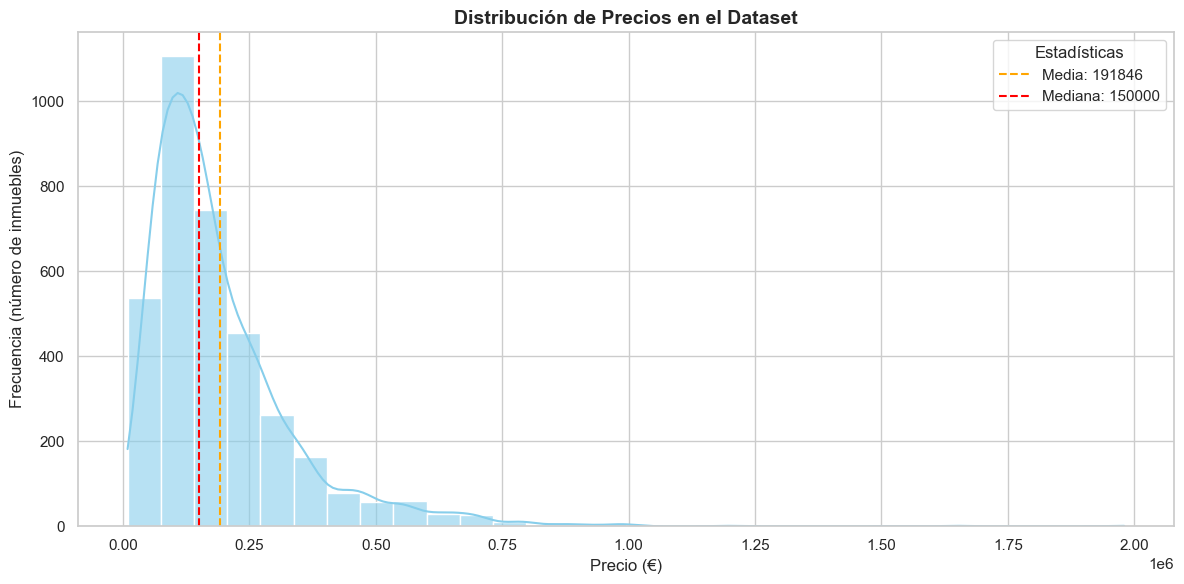

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))

# Histograma con KDE
sns.histplot(
    df['precio'], 
    bins=30, 
    kde=True, 
    color='skyblue', 
    alpha=0.6, 
    ax=ax
)

# Agregar líneas de referencia para la media y la mediana
ax.axvline(df['precio'].mean(), color='orange', linestyle='--', linewidth=1.5, label=f'Media: {round(df["precio"].mean())}')
ax.axvline(df['precio'].median(), color='red', linestyle='--', linewidth=1.5, label=f'Mediana: {round(df["precio"].median())}')

# Títulos y etiquetas
ax.set_title('Distribución de Precios en el Dataset', fontsize=14, fontweight='bold')
ax.set_xlabel('Precio (€)', fontsize=12)
ax.set_ylabel('Frecuencia (número de inmuebles)', fontsize=12)

# Leyenda
ax.legend(title='Estadísticas', loc='upper right')

plt.tight_layout()
plt.savefig("../img/distribucion_precios.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusión: Precio Promedio por Tipo de Inmueble

Los pisos son el tipo de inmueble más barato, con un precio promedio de 184,841 €, por debajo de la media global (191,846 €). En contraste, casas rurales, áticos y dúplex tienen precios bastante más altos.

Casa rural lidera con 293,499 €, seguida por áticos (276,263 €) y dúplex (252,592 €), todos por encima de la media.

Si se busca algo más accesible, los pisos son la opción más económica. Los inmuebles más caros probablemente lo son por su exclusividad o características adicionales.

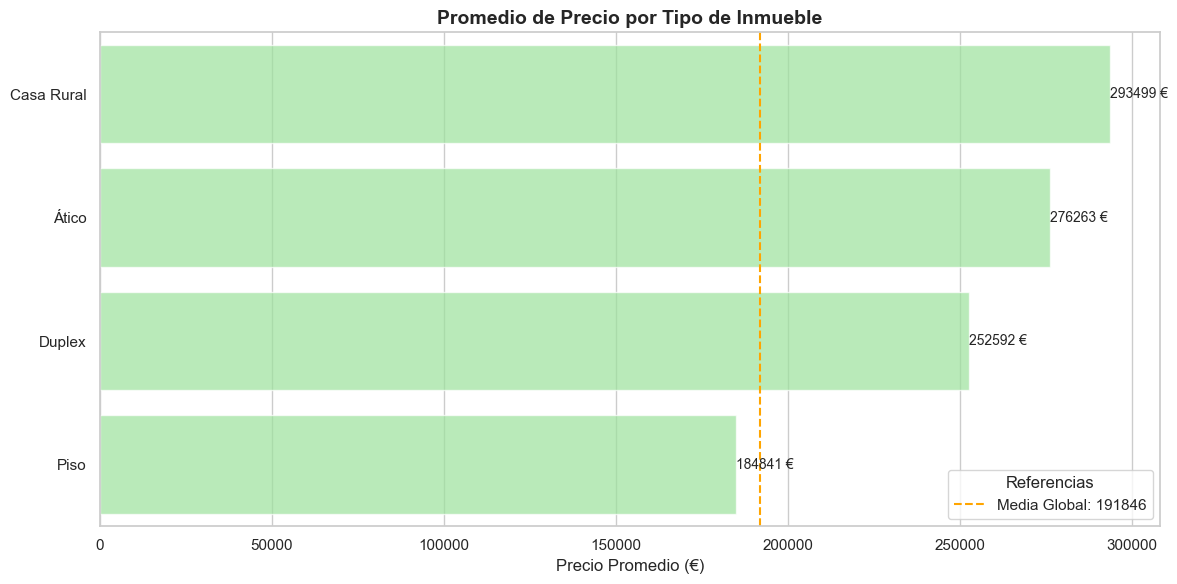

In [22]:
# Calcular promedio de precios por tipo de inmueble
precio_por_tipo = df.groupby('tipo_inmueble')['precio'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    x=precio_por_tipo.values, 
    y=precio_por_tipo.index, 
    color='lightgreen', 
    alpha=0.7,
    orient='h'
)

# Añadir línea de referencia para la media global
precio_medio_global = df['precio'].mean()
ax.axvline(precio_medio_global, color='orange', linestyle='--', linewidth=1.5, label=f'Media Global: {round(precio_medio_global)}')

# Etiquetas encima de las barras
for i, valor in enumerate(precio_por_tipo.values):
    ax.text(valor + 5, i, f'{round(valor)} €', va='center', fontsize=10)

# Títulos y etiquetas
ax.set_title('Promedio de Precio por Tipo de Inmueble', fontsize=14, fontweight='bold')
ax.set_xlabel('Precio Promedio (€)', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.legend(loc='lower right', title='Referencias')

plt.tight_layout()
plt.savefig("../img/precio_por_tipo_inmueble.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusión: Relación entre Metros Cuadrados Construidos y Precio

Existe una relación positiva entre el tamaño del inmueble y su precio, aunque con bastante dispersión. La mayoría de propiedades se concentran por debajo de los 250 m² y 500,000 €.

Los pisos suelen ocupar las zonas de menor tamaño y precio, mientras que casas rurales y áticos aparecen entre los más grandes y caros.

El tamaño influye claramente, pero no es el único factor determinante del precio.

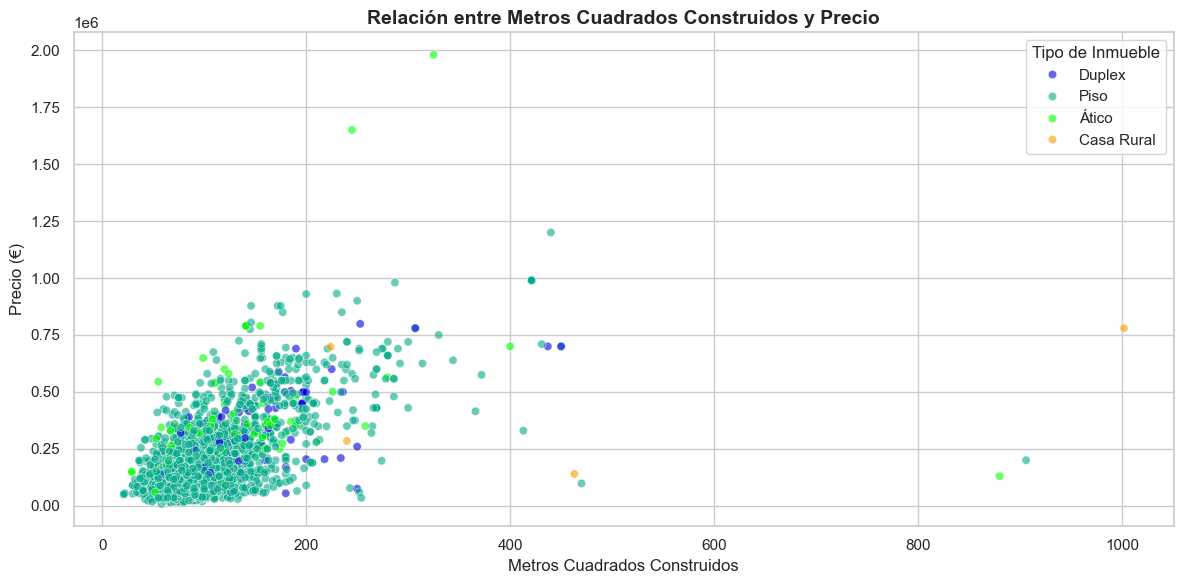

In [46]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, 
    x='m2_construidos', 
    y='precio', 
    hue='tipo_inmueble', 
    palette='nipy_spectral',
    alpha=0.6
)

plt.title("Relación entre Metros Cuadrados Construidos y Precio", fontsize=14, fontweight='bold')
plt.xlabel("Metros Cuadrados Construidos", fontsize=12)
plt.ylabel("Precio (€)", fontsize=12)
plt.legend(title="Tipo de Inmueble")

plt.tight_layout()
plt.savefig("../img/m2_vs_precio.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusión: Matriz de Correlación

El precio está fuertemente relacionado con los euros por metro cuadrado (0.70) y los metros construidos (0.58). También guardan cierta relación los baños (0.54) y habitaciones (0.38).

Los metros construidos se correlacionan especialmente con habitaciones (0.71) y baños (0.56), mientras que los euros/m² no tienen relación clara con otras variables.

En conjunto, tanto el tamaño como la calidad del inmueble influyen en su valor final.

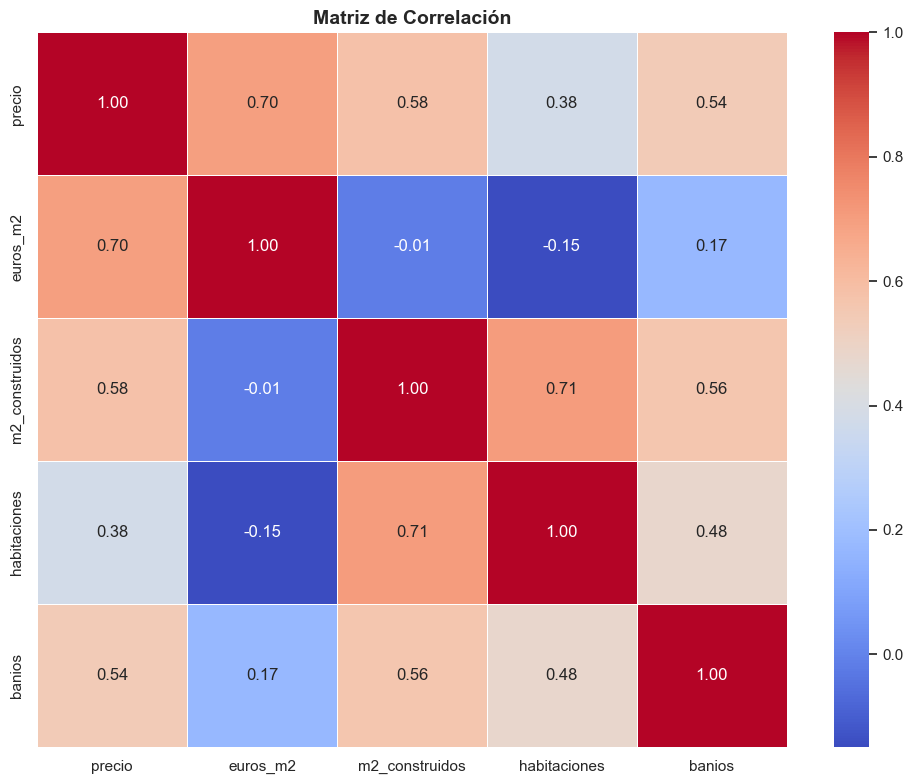

In [25]:
# Calcular matriz de correlación
corr_matrix = df[['precio', 'euros_m2', 'm2_construidos', 'habitaciones', 'banios']].corr()

# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlación", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("../img/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusión: Proporción de Características Adicionales

El ascensor es la característica más común, presente en casi el 80% de los inmuebles. Terraza y parking aparecen en torno al 30–35%, mientras que la piscina es muy poco frecuente, con menos del 5%.

Esto sugiere que ciertas comodidades básicas son habituales, pero extras como la piscina siguen siendo una excepción.

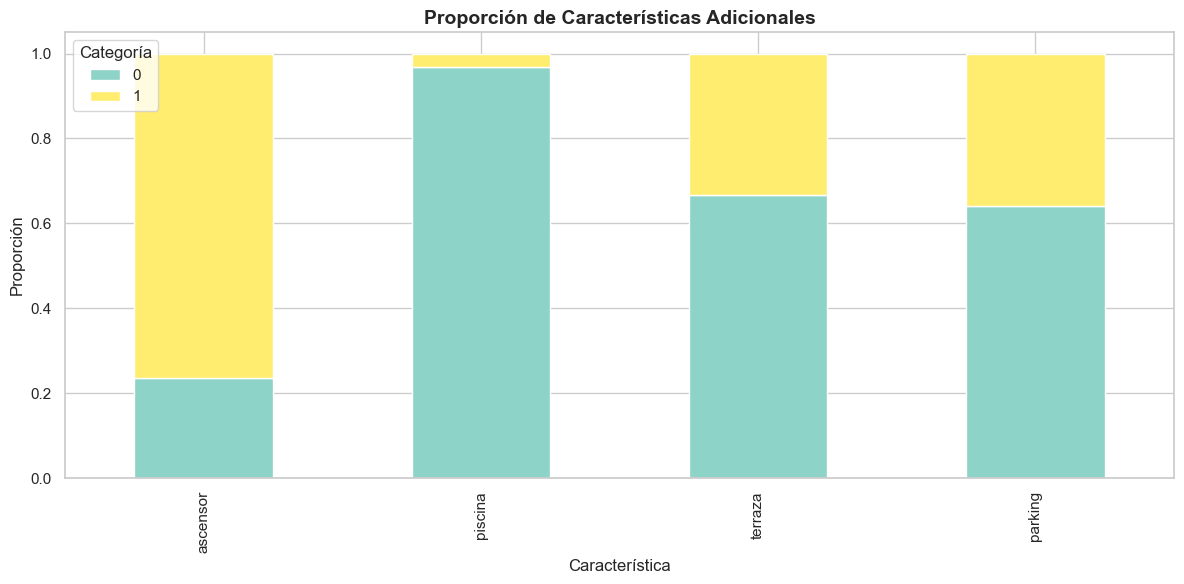

In [26]:
# Calcular proporciones
features = ['ascensor', 'piscina', 'terraza', 'parking']
feature_counts = df[features].apply(lambda col: col.value_counts(normalize=True)).T

# Crear gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 6))
feature_counts.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')

# Títulos y etiquetas
ax.set_title('Proporción de Características Adicionales', fontsize=14, fontweight='bold')
ax.set_xlabel('Característica', fontsize=12)
ax.set_ylabel('Proporción', fontsize=12)
ax.legend(title="Categoría", loc='upper left')

plt.tight_layout()
plt.savefig("../img/caracteristicas_adicionales.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusión: Proporción de Tipos de Inmueble y Vendedor

La gran mayoría de los inmuebles ofertados son pisos, con más del 90% del total. Tipos como dúplex, áticos y casas rurales apenas tienen presencia.

En cuanto al tipo de vendedor, predominan los profesionales (casi 80%), mientras que los particulares representan solo una parte menor del mercado.

Esto refleja un mercado concentrado en un solo tipo de inmueble y fuertemente dominado por agencias o intermediarios profesionales.

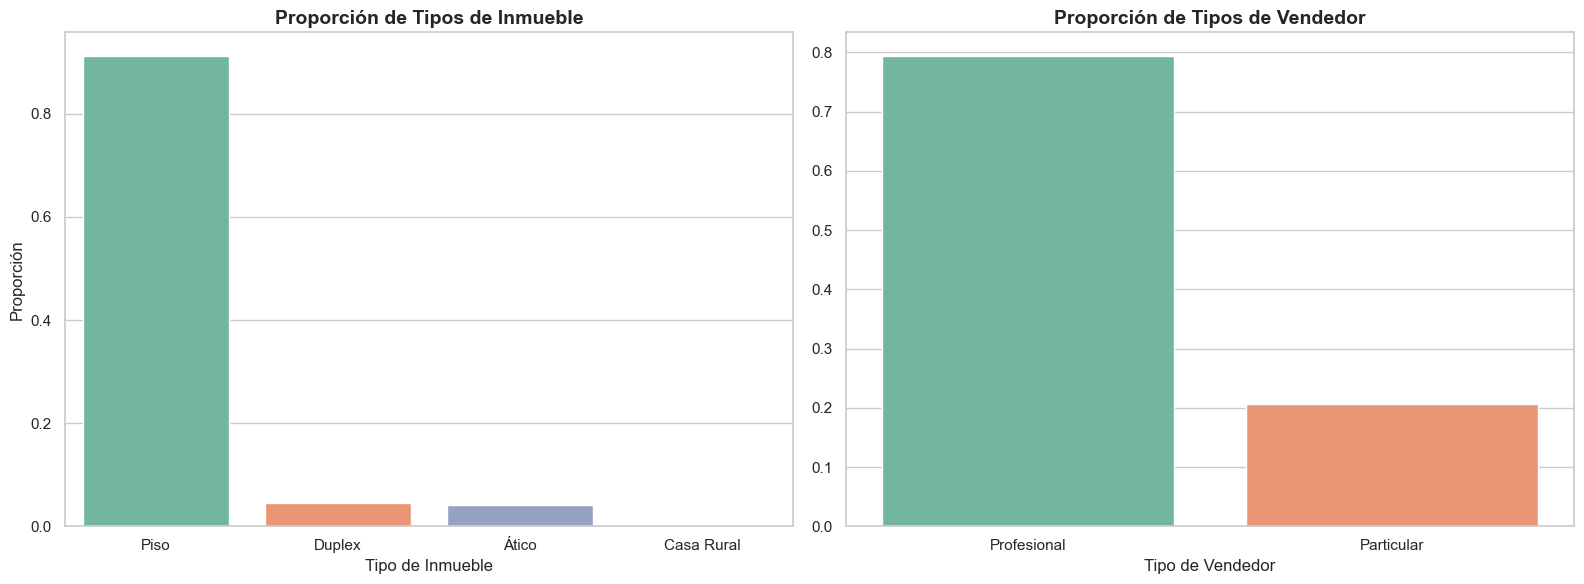

In [42]:
# Crear una figura con subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Ajusta el tamaño según sea necesario

# Proporción de tipos de inmueble
tipo_inmueble_counts = df['tipo_inmueble'].value_counts(normalize=True)
sns.barplot(
    x=tipo_inmueble_counts.index, 
    y=tipo_inmueble_counts.values, 
    palette='Set2', 
    ax=axes[0]
)
axes[0].set_title("Proporción de Tipos de Inmueble", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Tipo de Inmueble", fontsize=12)
axes[0].set_ylabel("Proporción", fontsize=12)

# Proporción de tipos de vendedor
tipo_vendedor_counts = df['tipo_vendedor'].value_counts(normalize=True)
sns.barplot(
    x=tipo_vendedor_counts.index, 
    y=tipo_vendedor_counts.values, 
    palette='Set2', 
    ax=axes[1]
)
axes[1].set_title("Proporción de Tipos de Vendedor", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Tipo de Vendedor", fontsize=12)

# Ajustar diseño para evitar solapamientos
plt.tight_layout()

# Guardar la figura combinada
plt.savefig("../img/tipo_inmueble_vendedor_proporcion.png", dpi=300, bbox_inches="tight")

# Mostrar la figura
plt.show()